## Markov Decision Processes (MDPs)
### University of Virginia
### Reinforcement Learning
#### Last updated: January 14, 2025

---


### SOURCES 

Reinforcement Learning, RS Sutton & AG Barto, 2nd edition. Chapter 3

### LEARNING OUTCOMES

- Understand the properties of Markov Decision Processes
- Describe the gains process and the agent's objective in RL
- Explain optimal policy and value functions
- Understand how the Bellman equation works 

### CONCEPTS

- Markov Process
- Markov Decision Process
- Estimating the value of each action in each state
- Estimating the value of each state given optimal action selection
- optimal policy
- optimal state value function, optimal action value function
- dynamics function
- discounting
- gains process
- Bellman equation
- backup diagram

---

#### Introducing the Markov Decision Process (MDP) Formalism

In reinforcement learning, time-varying state spaces are often modeled with Markov Decision Processes (MDP).  

For each time step *t*, an agent observes the current state of the environment $S_t$,  
takes action $A_t$, receives reward $R_{t+1}$, and transitions to new state $S_{t+1}$.

MDPs originate from field of *optimal control*

Very useful and applicable framework to decision-learning problems based on three signals:
- choices made by agent (actions)
- the basis on which choices are made (states)
- signal to define agent's goal (rewards)

Some important properties:

- they can model sequential decision-making
- the agent can be in a set of different states (finite or continuous)
- actions can be discrete or continuous
- the rewards are short-term, but collectively result in long-term value

A word about the **Markov** property:

This means that the future state will depend only on the current state. These sorts of processes are much easier to model.  

A Markov decision process is a 4-tuple $(S,A,P,R)$

$S$ is the state space  
$A$ is the action space  
$P$ is the probability transition matrix  
$R$ is the reward

Sometimes a discount factor $\gamma$ is also included in the tuple.  
Discounting future rewards is important for capturing time value of money, which is a finance concept.

This diagram illustrates the process:

![mdp](./mdp.png)

**Trajectories**

From the diagram, an agent's trajectory unfolds like this:

$S_0$, $A_0$, $R_1$, $S_1$, $A_1$, $R_2$, $S_2$, $A_2$, $R_3$, ...   

**Horizon**

Sequential decision making problems may be *finite horizon* or *infinite horizon*.

For a finite horizon *T*, nothing matters after this time ... things end.

Going forward, we  will consider infinite horizon problems.

**Dynamics**

For *finite MDP* (finite sets of states, actions, rewards), $R_t$ and $S_t$ have discrete probability distns.  
Distributions only depend on preceding state and action.  
Transition probability $p$ defines the dynamics:

$p(s',r|s,a) = P[S_t=s', R_t=r | S_{t-1}=s, A_{t-1}=a]$

Note: For many real-world problems, it is not possible to specify $p$.

#### Goals and Rewards

Rewards are short-term in nature. **The agent will have this objective: maximize total expected discounted reward.**  
It will attempt to learn the optimal policy (mapping states to actions) to reach this objective.  
This is what it means to solve the reinforcement learning problem.

To this end, we first define the *gains process* or *return* as a function of time.  
This is the sum of future rewards discounted to time $t$:

$G_t = R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + ... = \sum_{k=0}^{\infty} \gamma^k R_{t+k+1}$

Rewards may be random variables, so we work with expected gains.

The agent attempts to maximize expected gains by discovering the best action from each state.

##### Keeping the Gain Finite

For infinite horizon problems, total reward can go to infinity.

By discounting, the gain becomes finite:

$G_t = \sum_{k=0}^{\infty} \gamma^k R_{t+k+1} <= \sum_{k=0}^{\infty} \gamma^k R_{max} 
     = \frac{R_{max} }{1 - \gamma} $
     
where $R_{max}$ is the maximum reward

#### Policies and Value Functions

Denote policy as $\pi$

A policy is a mapping from each state to probabilities of selecting each action

It might be that each state maps to a single action with probability 1 (no uncertainty)

The optimal policy is denoted $\pi_*$

**state-value functions**

It is important to understand the value of starting from a state and following a given policy.

This is denoted $v_{\pi}(s)$

Definition using the gains process:

$v_\pi(s) = \mathbb{E}_{\pi}[G_t | S_t=s] = \mathbb{E}_{\pi}\left[\sum_{k=0}^{\infty}\gamma^k R_{t+k+1} | S_t=s \right]$ for all $s \in S$

**action-value functions**

The agent will want to improve upon a policy. To do this, it must measure the value of  

1) starting in state $s$  
2) trying action $a$  
3) following policy $\pi$ for the remainder of the actions

This quantity, which is fundamental in Q-Learning, is denoted $q_{\pi}(s, a)$

Definition using the gains process:

$q_\pi(s,a) =  \mathbb{E}_{\pi}[G_t | S_t=s, A_t=a] = \mathbb{E}_{\pi}\left[\sum_{k=0}^{\infty}\gamma^k R_{t+k+1} | S_t=s, A_t=a \right]$ for all $s \in S$

The value functions can be written in a recursive form. The *Bellman equation* for $v_{\pi}$ is as follows:

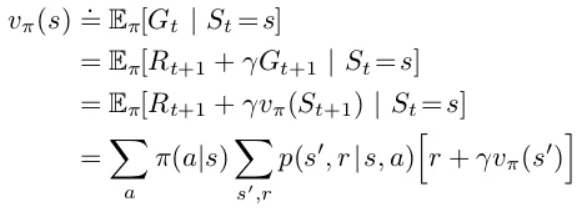![bellman](./bellman.png)

The quantity $\pi(a|s)$ allows for a stochastic policy where action $a$ is taken with some probability given state $s$.

Notice what the equation says: the value of a state for a given policy is a function of immediate reward $r$ as well as the discounted value of the next state. This is the recursion.

The expression is an expected value over all combinations of $r$, $s'$, and $a$.  
The triple $(r,s',a)$ is weighted by probability $\pi(a|s)p(s',r|s,a)$

#### Backup Diagram

*Backup diagrams* are often used to explain the dynamics in reinforcement learning approaches.  
Starting from state $s$ at the top, the agent has a policy which can select from three actions.  
After an action is selected (shown as $a$ here), the environment responds with one of two possible states.  
Transitioning to the state at far right, the agent collects immediate reward $r$ and moves to state s'.  

The Bellman equation computes the value of state $s$ by weighting each possible path by its probability. 

![v_backup_diagram](./v_backup_diagram.png)

#### Optimality

The agent solves the reinforcement learning problem (and the Bellman equation) by finding the best policy $\pi_*$

This policy, which uses the best action from each state, will maximize reward in each state.

The optimal state value function is defined as: 

$v_*(s) := \underset{\pi}{\operatorname{\max}} v_{\pi}(s)$ for all states

The optimal action value function is defined as: 

$q_*(s,a) := \underset{\pi}{\operatorname{\max}} q_{\pi}(s,a)$

Our efforts will be to learn these quantities

---